In [1]:
import pandas as pd

In [5]:
data=pd.read_csv('./CC GENERAL.csv')

In [6]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
from sklearn.cluster import KMeans


In [10]:
len(data.columns)

18

In [27]:
%matplotlib inline
data['CREDIT_LIMIT'].mean()

4494.449450364621

In [29]:
data.fillna(data['CREDIT_LIMIT'].mean(),inplace=True)

In [30]:
clus_data=data.iloc[:,1:]


In [31]:
from sklearn import preprocessing

In [32]:
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(clus_data)

C:\Users\uesr\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [53]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(scaled_array)

y_kmeans = kmeans.predict(scaled_array)


In [40]:
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

In [43]:
import numpy as np
from sklearn.decomposition import PCA


In [56]:
pca = PCA(n_components=10)
pca.fit(clus_data.T)

pca_data=pca.components_.T

In [57]:
sum(pca.explained_variance_ratio_)

0.9999996142301998

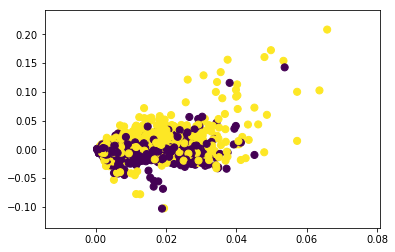

In [52]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=y_kmeans, s=50, cmap='viridis')

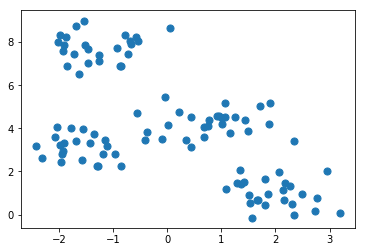

In [37]:
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);